In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, silhouette_samples
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import warnings

In [2]:
pd.set_option('display.max_columns',None)
warnings.filterwarnings("ignore")

In [3]:
X = pd.read_csv('../dados_processados/cursos-pos-processamento.csv',sep=';')

In [4]:
X.shape

(3205, 37)

In [5]:
X_to_train = X.drop(['no_curso','co_curso'],axis=1)

In [6]:
min_clusters = 2
max_clusters = 20
results = []

for n_clusters in range(min_clusters, max_clusters + 1):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
    labels = agg_clustering.fit_predict(X_to_train)

    silhouette = silhouette_score(X_to_train, labels)
    calinski = calinski_harabasz_score(X_to_train, labels)
    davies = davies_bouldin_score(X_to_train, labels)

    results.append((n_clusters, silhouette, calinski, davies))

columns = ["Cluster", "Silhouette Coefficient", "Calinski-Harabasz Index", "Davies-Bouldin Index"]
df = pd.DataFrame(results, columns=columns)

In [7]:
df

,Cluster,Silhouette Coefficient,Calinski-Harabasz Index,Davies-Bouldin Index
0,2,0.229532,2.263027,0.639169
1,3,0.209443,2.535687,0.617251
2,4,0.198911,2.483939,0.618620
3,5,0.184430,2.503443,0.614952
4,6,0.132644,2.366168,0.643901
5,7,0.130566,2.540923,0.626070
6,8,0.111334,2.441973,0.636167
7,9,0.108670,2.409441,0.637698
8,10,0.106742,2.394329,0.637614
9,11,0.102506,2.424137,0.632827


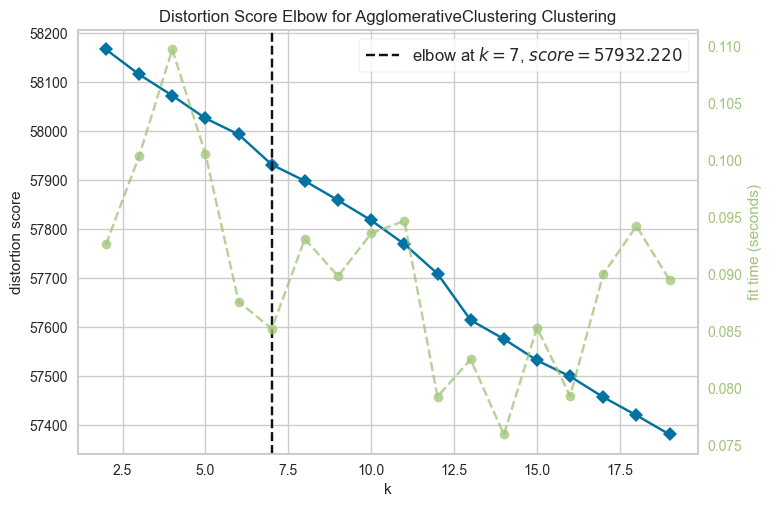

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
visualizer = KElbowVisualizer(AgglomerativeClustering(linkage='single'), k=(2, 20))
visualizer.fit(X_to_train)
visualizer.show()

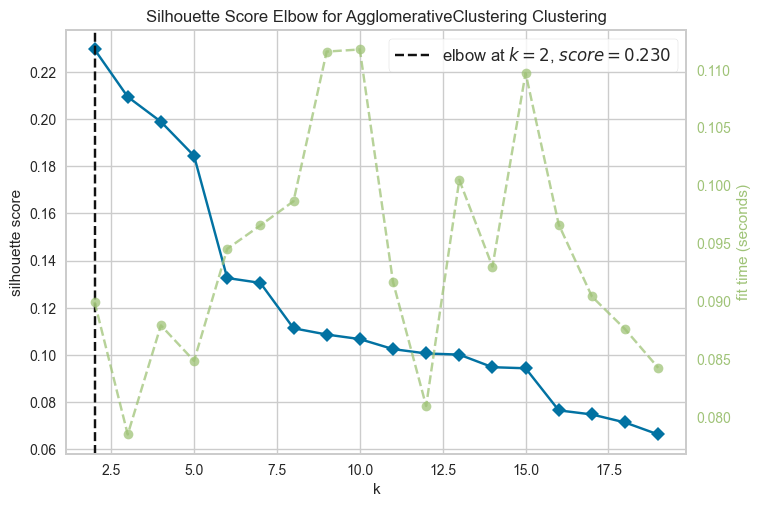

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [9]:
visualizer = KElbowVisualizer(AgglomerativeClustering(linkage='single'), k=(2, 20),metric='silhouette')
visualizer.fit(X_to_train)
visualizer.show()

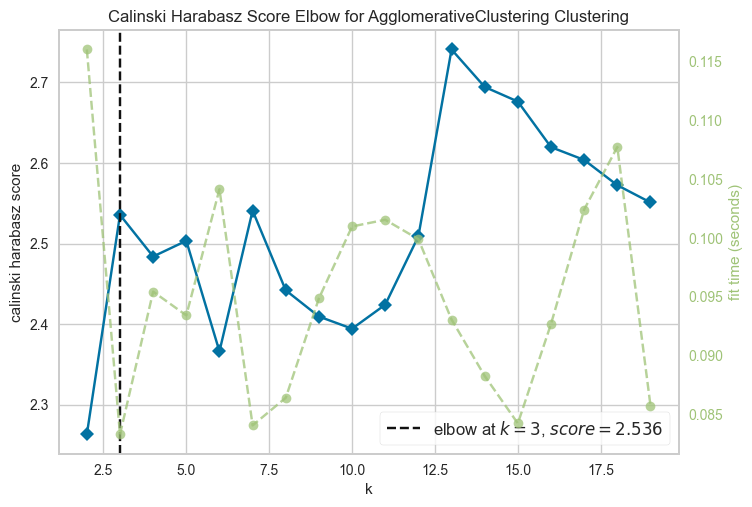

<Axes: title={'center': 'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [10]:
visualizer = KElbowVisualizer(AgglomerativeClustering(linkage='single'), k=(2, 20),metric='calinski_harabasz')
visualizer.fit(X_to_train)
visualizer.show()